# Emotion Analysis

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/emotion](https://github.com/huseinzol05/Malaya/tree/master/example/emotion).
    
</div>

<div class="alert alert-info">

This module trained on both standard and local (included social media) language structures, so it is save to use for both.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 6.41 s, sys: 1.3 s, total: 7.71 s
Wall time: 9.2 s


### Models accuracy

We use `sklearn.metrics.classification_report` for accuracy reporting, check at https://malaya.readthedocs.io/en/latest/models-accuracy.html#emotion-analysis

### labels supported

Default labels for emotion module.

In [2]:
malaya.emotion.label

['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']

### Example texts

Copy pasted from random tweets.

In [3]:
anger_text = 'babi la company ni, aku dah la penat datang dari jauh'
fear_text = 'takut doh tengok cerita hantu tadi'
happy_text = 'bestnya dapat tidur harini, tak payah pergi kerja'
love_text = 'aku sayang sgt dia dah doh'
sadness_text = 'kecewa tengok kerajaan baru ni, janji ape pun tak dapat'
surprise_text = 'sakit jantung aku, terkejut dengan cerita hantu tadi'

### Load multinomial model

```python
def multinomial(**kwargs):
    """
    Load multinomial emotion model.

    Returns
    -------
    result : malaya.model.ml.Bayes class
    """
```

In [4]:
model = malaya.emotion.multinomial()

#### Predict batch of strings

```python
def predict(self, strings: List[str]):
    """
    classify list of strings.

    Parameters
    ----------
    strings: List[str]

    Returns
    -------
    result: List[str]
    """
```

In [5]:
model.predict([anger_text])

['anger']

In [6]:
model.predict(
    [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
)

['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']

#### Predict batch of strings with probability

```python
def predict_proba(self, strings: List[str]):
    """
    classify list of strings and return probability.

    Parameters
    ----------
    strings: List[str]

    Returns
    -------
    result: List[dict[str, float]]
    """
```

In [7]:
model.predict_proba(
    [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
)

[{'anger': 0.32948272681734814,
  'fear': 0.13959708810717708,
  'happy': 0.14671455153216045,
  'love': 0.12489192355631354,
  'sadness': 0.1285972541671178,
  'surprise': 0.13071645581988448},
 {'anger': 0.11379406005377896,
  'fear': 0.4006934391283133,
  'happy': 0.11389665647702245,
  'love': 0.12481915233837086,
  'sadness': 0.0991261507380643,
  'surprise': 0.14767054126445014},
 {'anger': 0.14667998117610198,
  'fear': 0.1422732633232615,
  'happy': 0.29984520430807293,
  'love': 0.1409005078277281,
  'sadness': 0.13374705318404811,
  'surprise': 0.13655399018078768},
 {'anger': 0.1590563839629243,
  'fear': 0.14687344690114268,
  'happy': 0.1419948160674701,
  'love': 0.279550441361504,
  'sadness': 0.1285927908584157,
  'surprise': 0.14393212084854254},
 {'anger': 0.13425914937312508,
  'fear': 0.12053328146716755,
  'happy': 0.14923350911233682,
  'love': 0.10289492749919464,
  'sadness': 0.36961334597699913,
  'surprise': 0.12346578657117815},
 {'anger': 0.06724850384395685

### List available Transformer models

In [4]:
malaya.emotion.available_transformer()

,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,425.6,111.00,0.99786,0.99773,0.99779
tiny-bert,57.4,15.40,0.99692,0.99696,0.99694
albert,48.6,12.80,0.99740,0.99773,0.99757
tiny-albert,22.4,5.98,0.99325,0.99378,0.99351
xlnet,446.5,118.00,0.99773,0.99775,0.99774
alxlnet,46.8,13.30,0.99663,0.99697,0.99680
fastformer,446.0,113.00,0.99197,0.99194,0.99195
tiny-fastformer,77.2,19.60,0.98926,0.98783,0.98853


### Load Transformer model

```python
def transformer(model: str = 'xlnet', quantized: bool = False, **kwargs):
    """
    Load Transformer emotion model.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
        * ``'fastformer'`` - FastFormer BASE parameters.
        * ``'tiny-fastformer'`` - FastFormer TINY parameters.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: model
        List of model classes:

        * if `bert` in model, will return `malaya.model.bert.MulticlassBERT`.
        * if `xlnet` in model, will return `malaya.model.xlnet.MulticlassXLNET`.
        * if `fastformer` in model, will return `malaya.model.fastformer.MulticlassFastFormer`.
    """
```

In [4]:
model = malaya.emotion.transformer(model = 'albert')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [31]:
quantized_model = malaya.emotion.transformer(model = 'albert', quantized = True)

INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


#### Predict batch of strings

```python
def predict(self, strings: List[str]):
    """
    classify list of strings.

    Parameters
    ----------
    strings: List[str]

    Returns
    -------
    result: List[str]
    """
```

In [33]:
model.predict(
    [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
)

['anger', 'fear', 'anger', 'love', 'sadness', 'surprise']

In [34]:
quantized_model.predict(
    [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
)

['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']

#### Predict batch of strings with probability

```python
def predict_proba(self, strings: List[str]):
    """
    classify list of strings and return probability.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: List[dict[str, float]]
    """
```

In [14]:
model.predict_proba(
    [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
)

[{'anger': 0.9998901,
  'fear': 3.2524113e-05,
  'happy': 2.620931e-05,
  'love': 2.2871463e-05,
  'sadness': 9.782951e-06,
  'surprise': 1.8502667e-05},
 {'anger': 1.6941378e-05,
  'fear': 0.9999205,
  'happy': 9.070281e-06,
  'love': 2.044179e-05,
  'sadness': 6.7731107e-06,
  'surprise': 2.6314676e-05},
 {'anger': 0.15370166,
  'fear': 0.0013852724,
  'happy': 0.8268689,
  'love': 0.011433229,
  'sadness': 0.0011807577,
  'surprise': 0.005430276},
 {'anger': 1.2597201e-05,
  'fear': 1.7600481e-05,
  'happy': 9.667115e-06,
  'love': 0.9999331,
  'sadness': 1.3735416e-05,
  'surprise': 1.3399296e-05},
 {'anger': 1.9176923e-05,
  'fear': 1.1163729e-05,
  'happy': 6.353941e-06,
  'love': 7.004002e-06,
  'sadness': 0.99994576,
  'surprise': 1.0511084e-05},
 {'anger': 5.8739704e-05,
  'fear': 1.9771342e-05,
  'happy': 1.8316741e-05,
  'love': 2.2319455e-05,
  'sadness': 3.646786e-05,
  'surprise': 0.9998443}]

In [15]:
quantized_model.predict_proba(
    [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
)

[{'anger': 0.99988353,
  'fear': 3.5938003e-05,
  'happy': 2.7778764e-05,
  'love': 2.3541537e-05,
  'sadness': 9.574292e-06,
  'surprise': 1.9607493e-05},
 {'anger': 1.6855265e-05,
  'fear': 0.9999219,
  'happy': 9.185196e-06,
  'love': 2.0216348e-05,
  'sadness': 6.6679663e-06,
  'surprise': 2.5186611e-05},
 {'anger': 0.22842072,
  'fear': 0.001628682,
  'happy': 0.7477462,
  'love': 0.014303649,
  'sadness': 0.0013838055,
  'surprise': 0.00651699},
 {'anger': 1.28296715e-05,
  'fear': 1.7833345e-05,
  'happy': 9.577061e-06,
  'love': 0.9999324,
  'sadness': 1.3832815e-05,
  'surprise': 1.34745715e-05},
 {'anger': 1.9776813e-05,
  'fear': 1.1116885e-05,
  'happy': 6.3422367e-06,
  'love': 6.905633e-06,
  'sadness': 0.9999455,
  'surprise': 1.0316757e-05},
 {'anger': 5.8218586e-05,
  'fear': 2.07504e-05,
  'happy': 1.8061248e-05,
  'love': 2.1852256e-05,
  'sadness': 3.5944133e-05,
  'surprise': 0.99984515}]

#### Open emotion visualization dashboard

```python
def predict_words(
    self,
    string: str,
    method: str = 'last',
    bins_size: float = 0.05,
    visualization: bool = True,
):
    """
    classify words.

    Parameters
    ----------
    string : str
    method : str, optional (default='last')
        Attention layer supported. Allowed values:

        * ``'last'`` - attention from last layer.
        * ``'first'`` - attention from first layer.
        * ``'mean'`` - average attentions from all layers.
    bins_size: float, optional (default=0.05)
        default bins size for word distribution histogram.
    visualization: bool, optional (default=True)
        If True, it will open the visualization dashboard.

    Returns
    -------
    dictionary: results
    """
```

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [5]:
model.predict_words(sadness_text)

### Vectorize

Let say you want to visualize sentence / word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str], method: str = 'first'):
    """
    vectorize list of strings.

    Parameters
    ----------
    strings: List[str]
    method : str, optional (default='first')
        Vectorization layer supported. Allowed values:

        * ``'last'`` - vector from last sequence.
        * ``'first'`` - vector from first sequence.
        * ``'mean'`` - average vectors from all sequences.
        * ``'word'`` - average vectors based on tokens.

    Returns
    -------
    result: np.array
    """
```

#### Sentence level

In [20]:
texts = [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
r = quantized_model.vectorize(texts, method = 'first')

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r)
tsne.shape

(6, 2)

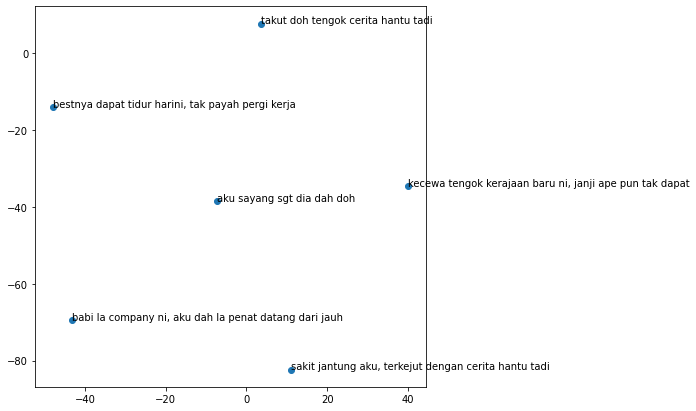

In [22]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = texts
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

#### Word level

In [23]:
r = quantized_model.vectorize(texts, method = 'word')

In [24]:
x, y = [], []
for row in r:
    x.extend([i[0] for i in row])
    y.extend([i[1] for i in row])

In [25]:
tsne = TSNE().fit_transform(y)
tsne.shape

(49, 2)

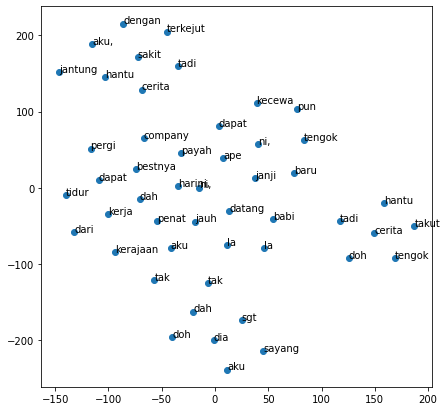

In [26]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

Pretty good, the model able to know cluster top right as surprise emotion.

### Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [27]:
multinomial = malaya.emotion.multinomial()

In [28]:
malaya.stack.predict_stack([multinomial, model], [anger_text])

[{'anger': 0.5739743139312979,
  'fear': 0.002130791264743306,
  'happy': 0.0019609404077070573,
  'love': 0.0016901068202818533,
  'sadness': 0.001121633002361737,
  'surprise': 0.0015551851123993595}]

In [29]:
malaya.stack.predict_stack([multinomial, model], [anger_text, sadness_text])

[{'anger': 0.5739743139312979,
  'fear': 0.002130791264743306,
  'happy': 0.0019609404077070573,
  'love': 0.0016901068202818533,
  'sadness': 0.001121633002361737,
  'surprise': 0.0015551858768478731},
 {'anger': 0.001604580129233267,
  'fear': 0.0011600003908574707,
  'happy': 0.0009737663531537643,
  'love': 0.0008489265368074127,
  'sadness': 0.6079418541812244,
  'surprise': 0.001139192858067602}]